In [12]:
import os
import nltk
import re
import numpy as np
from hazm import word_tokenize, Lemmatizer, Stemmer, Normalizer
from pprint import pprint
import pandas as pd
from tensorflow import keras
from keras.preprocessing.text import Tokenizer


2022-05-03 20:15:25.939654: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-03 20:15:25.939733: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
raw_text = pd.read_csv('Shams_Corpus_Paper3.txt')
raw_text.iloc[5]

دیوان شمس تبریزی (غزلیات)    صورت دل صورت مخلوق نیست\tکز رخ دل حسن خدا رو نمود
Name: 5, dtype: object

In [45]:
file = open(os.getcwd() + "/Shams_Corpus_Paper3.txt", "rt")
raw_text = file.read()
file.close()


In [59]:
def remove_persian_stopword(tokens):
    file = open(os.getcwd() + "/persian_stopw.txt", "rt")
    raw_stop_words = file.read()
    file.close()

    stop_words = word_tokenize(raw_stop_words)

    return [word for word in tokens if not word in stop_words]

In [60]:
def normalize_text(text):
    normalizer = Normalizer()
    
    return normalizer.normalize(text)

In [61]:
def lemma_tokenizer(tokens):
    lemmatizer = Lemmatizer()    
    return [lemmatizer.lemmatize(token) for token in tokens]

In [62]:
def stem_tokenizer(tokens):
    stemmer = Stemmer()
    return [stemmer.stem(token) for token in tokens]

In [76]:
raw_text = "".join([i for i in raw_text if not i.isdigit()])
raw_text = re.sub(r"-+|\d+", "", raw_text)

raw_text = normalize_text(raw_text)

raw_tokens = word_tokenize(raw_text)
len(raw_tokens)

78389

In [77]:
type(raw_tokens)

list

In [89]:
tokens = remove_persian_stopword(raw_tokens)
len(tokens)

47335

In [90]:
t = Tokenizer()
t.fit_on_texts(tokens)

In [91]:
count_list = sorted(t.word_counts.items(), key=lambda x: x[1], reverse=True)

In [92]:
for key, value in count_list:
    print(key, '->', value)

دل -> 621
جان -> 587
عشق -> 455
سر -> 390
شمس -> 210
خوش -> 187
آب -> 179
دست -> 175
سوی -> 174
چشم -> 171
خویش -> 171
جهان -> 167
صد -> 165
یار -> 162
دم -> 154
روی -> 145
شب -> 143
کار -> 141
رو -> 140
مست -> 138
پر -> 127
شکر -> 123
آتش -> 121
عاشق -> 121
نی -> 121
روز -> 120
خون -> 114
گل -> 113
باده -> 112
غم -> 108
عقل -> 107
کو -> 105
یکی -> 102
خاک -> 100
مه -> 98
تن -> 97
نور -> 96
بس -> 95
ره -> 95
ترش -> 92
خانه -> 90
نمی‌دانم -> 90
جمله -> 89
چرخ -> 88
باز -> 85
لطف -> 85
خورشید -> 85
آخر -> 85
عالم -> 79
زین -> 79
رخ -> 78
گوش -> 78
دین -> 77
ماه -> 77
لب -> 76
چونک -> 73
ساقی -> 73
نظر -> 73
تبریزی -> 72
تبریز -> 72
باغ -> 72
آفتاب -> 71
پرده -> 70
گشت -> 70
شیر -> 70
سیر -> 70
باد -> 69
پی -> 68
دیده -> 68
پای -> 68
دور -> 67
دلم -> 66
کان -> 66
زر -> 66
برون -> 65
گرد -> 65
جام -> 64
زیر -> 64
مستی -> 64
زهی -> 64
شه -> 63
می -> 63
سنگ -> 63
میان -> 61
گه -> 61
دوست -> 60
بحر -> 60
روح -> 60
بهر -> 60
وان -> 59
شاه -> 59
آنک -> 58
خواب -> 58
خواجه -> 57
نگر -> 57
پسر ->

صلاح -> 7
پران -> 7
دفع -> 7
آهنگ -> 7
نیابد -> 7
داغ -> 7
پرد -> 7
نما -> 7
خران -> 7
قرین -> 7
القمر -> 7
دوستان -> 7
طبیبان -> 7
همیشه -> 7
سازم -> 7
مطربان -> 7
سکر -> 7
خنب -> 7
بگفتمش -> 7
خیزد -> 7
شاهی -> 7
هان -> 7
ریش -> 7
بگویمت -> 7
نمک -> 7
شتران -> 7
بگذار -> 7
استاره -> 7
پیشم -> 7
کیف -> 7
زرم -> 7
دعوی -> 7
نهاد -> 7
دایه -> 7
موش -> 7
سان -> 7
بخشد -> 7
قاصد -> 7
شکستم -> 7
بیزارم -> 7
انگشت -> 7
برآریم -> 7
منور -> 6
ربود -> 6
صحرا -> 6
نسرین -> 6
دوزخ -> 6
زیان -> 6
ریخت -> 6
جنبش -> 6
پریشان -> 6
همگان -> 6
سره -> 6
جوان -> 6
مغز -> 6
هذا -> 6
ملولی -> 6
یوم -> 6
الف -> 6
فدای -> 6
لی -> 6
گذشت -> 6
دلق -> 6
خلعت -> 6
ظلم -> 6
هوی -> 6
پوش -> 6
وجهک -> 6
روش -> 6
عقلی -> 6
وین‌ها -> 6
نیش -> 6
دلان -> 6
دانش -> 6
ذره‌ها -> 6
بالای -> 6
چست -> 6
فاش -> 6
یاوه -> 6
فصل -> 6
خوری -> 6
پرخون -> 6
مشتاق -> 6
بیداری -> 6
لولی -> 6
خویشی -> 6
جعد -> 6
سرمه -> 6
تخم -> 6
صبوح -> 6
همسایه -> 6
نخواهد -> 6
ماننده -> 6
تاریک -> 6
رشته -> 6
طرفی -> 6
جسته -> 6
احمر -> 6
رنگی -

شکری -> 3
قباد -> 3
بیخودی -> 3
نروید -> 3
نخواهم -> 3
گفت -> 3
نخواهیم -> 3
خراباتی -> 3
پرهیز -> 3
مفرش -> 3
کوش -> 3
خشخاش -> 3
پشته -> 3
زندم -> 3
بنهد -> 3
بزند -> 3
درگاه -> 3
یتیمان -> 3
ولوله -> 3
آوازه -> 3
زلفین -> 3
بیت -> 3
میم -> 3
ربکم -> 3
لدینا -> 3
فیک -> 3
اتی -> 3
انظر -> 3
انشق -> 3
المنن -> 3
فمن -> 3
عندی -> 3
التیه -> 3
الخبر -> 3
السلوی -> 3
ربی -> 3
اسکت -> 3
انتم -> 3
البشر -> 3
حقا -> 3
بربط -> 3
المجلس -> 3
همت -> 3
ابتر -> 3
عتاب -> 3
حیث -> 3
زرگر -> 3
طول -> 3
طیب -> 3
الشمس -> 3
منکم -> 3
عجبا -> 3
حبذا -> 3
تاویل -> 3
قلاوز -> 3
جمالی -> 3
نوای -> 3
پیروز -> 3
برافروز -> 3
بیماران -> 3
شین -> 3
خلاص -> 3
خلایق -> 3
حیفست -> 3
اعزاز -> 3
مگشای -> 3
مستیز -> 3
عدوی -> 3
تندی -> 3
تاری -> 3
شهری -> 3
اسبت -> 3
کمانم -> 3
موافقت -> 3
کننده -> 3
سازش -> 3
غمز -> 3
غنی -> 3
لما -> 3
رخی -> 3
فرش -> 3
تزویر -> 3
شعشعه -> 3
شنوم -> 3
فرقت -> 3
ضعیف -> 3
جرس -> 3
حوالی -> 3
نخوریم -> 3
سقای -> 3
خروس -> 3
پرکنده -> 3
بادام -> 3
مجرم -> 3
نون -> 3
خشت -> 3
دوک ->

منهاج -> 2
ماء -> 2
زرگری -> 2
خمرا -> 2
حیاتنا -> 2
بمران -> 2
عثمان -> 2
القلب -> 2
ینجلی -> 2
الصبر -> 2
الفکر -> 2
النار -> 2
یسکر -> 2
نادان -> 2
رنگارنگ -> 2
رنگش -> 2
تصفر -> 2
المعشوق -> 2
الارواح -> 2
عبره -> 2
الاثار -> 2
تعجب -> 2
انی -> 2
نات -> 2
دنت -> 2
زی -> 2
لیلتی -> 2
خلف -> 2
بوسی -> 2
روزافزون -> 2
نیلوفر -> 2
مهتاب -> 2
صیادی -> 2
آموز -> 2
فراقش -> 2
بخندان -> 2
بیاموز -> 2
اسماعیل -> 2
معنیست -> 2
پنیری -> 2
چنانستم -> 2
بپیوستم -> 2
ترنجی -> 2
پرمی -> 2
مقامی -> 2
واگشت -> 2
معلوم -> 2
بنپرستم -> 2
پیروزه -> 2
بردوز -> 2
غلامت -> 2
مهموز -> 2
شود -> 2
مرموز -> 2
آسایش -> 2
حمیرا -> 2
منطق -> 2
پدفوز -> 2
دوانست -> 2
مسیحا -> 2
موفا -> 2
بریان -> 2
معذورم -> 2
دلیر -> 2
پرداز -> 2
انباز -> 2
مپر -> 2
تسلیم -> 2
قلاوزی -> 2
بتاز -> 2
دعاها -> 2
راضی -> 2
پذیرد -> 2
نواز -> 2
گداز -> 2
پیشگاه -> 2
ضربی -> 2
نغمه -> 2
سلطانان -> 2
ایاز -> 2
مسلم -> 2
نشستن -> 2
اعلام -> 2
عاشقانه -> 2
فوز -> 2
یجوز -> 2
لایجوز -> 2
کوز -> 2
ناقص -> 2
توز -> 2
یارت -> 2
طپیدن -> 2
ع

قدیمیم -> 2
شتابید -> 2
اینیم -> 2
ببستیم -> 2
نشستیم -> 2
مگویید -> 2
بشکستیم -> 2
شیریم -> 2
جهانیم -> 2
مخسپید -> 2
پدیدیم -> 2
نپذیرد -> 2
مریدیم -> 2
عشقیم -> 2
بدادیم -> 2
بتابید -> 2
چنانیم -> 2
نتوانم -> 2
طومار -> 2
بشویی -> 2
بجویید -> 2
بریدیم -> 2
دلشادم -> 2
پربادم -> 2
تختی -> 2
مولایم -> 2
منقادم -> 2
شرحی -> 2
ارشادش -> 2
می‌پرستم -> 2
غزلیات -> 1
سوختم -> 1
یوسفم -> 1
چهم -> 1
چنبره -> 1
بهشتی -> 1
ظلمتت -> 1
بنگرید -> 1
فسردست -> 1
جمره -> 1
بگدازد -> 1
جلید -> 1
رومست -> 1
ترسابچه -> 1
خواندش -> 1
فرید -> 1
گفتش -> 1
ببخش -> 1
بخورم -> 1
تبشم -> 1
بفسرید -> 1
خداشان -> 1
یکایک -> 1
جبریل -> 1
گلروی -> 1
بقاست -> 1
تختگه -> 1
جایگه -> 1
کیقباد -> 1
فساد -> 1
مکون -> 1
خلط -> 1
ارتقاد -> 1
بزرگست -> 1
بختست -> 1
نسیمی -> 1
اندردمید -> 1
ولاد -> 1
عربده‌گر -> 1
برفزود -> 1
عسسی -> 1
قبایش -> 1
کمرش -> 1
بنوازید -> 1
دیدش -> 1
می‌دلگشا -> 1
جغدان -> 1
جهود -> 1
خرابیم -> 1
خراباتییم -> 1
آزمود -> 1
خوبست -> 1
حسود -> 1
پشیمان -> 1
حوصله -> 1
عمان -> 1
همصفت -> 1
برگزید -

برکرد -> 1
پوسیدگان -> 1
رازی -> 1
بیخی -> 1
نداشت -> 1
نکوشاخ -> 1
بختیار -> 1
بساخت -> 1
گندنا -> 1
معاینه -> 1
پشه‌ای -> 1
دمار -> 1
برهنه‌ای -> 1
مصورات -> 1
گردنده -> 1
گلگونه‌ای -> 1
سرفتنه‌ای -> 1
زریر -> 1
رسوم -> 1
می‌سریشد -> 1
معده‌ها -> 1
ستیر -> 1
شیی -> 1
نواله -> 1
صله -> 1
سلوی -> 1
بعیر -> 1
تهمتنی -> 1
مطیر -> 1
خیالیان -> 1
بشتابند -> 1
مسیر -> 1
خورشیدوار -> 1
پرشرار -> 1
رستیم -> 1
آمده -> 1
قندبار -> 1
پزید -> 1
ثبات -> 1
بردرید -> 1
دلفکار -> 1
تندخو -> 1
مرانش -> 1
پرثمر -> 1
جوبجو -> 1
کسش -> 1
قلندردلی -> 1
منیست -> 1
چارپر -> 1
دله‌ام -> 1
رضا -> 1
ثابتم -> 1
بمرم -> 1
صبرست -> 1
کلاه -> 1
منبت -> 1
مادرت -> 1
دمه‌ای -> 1
باخت -> 1
روی‌ها -> 1
الصلات -> 1
بازمرانش -> 1
دیدمش -> 1
تیزروان -> 1
دمه -> 1
آهسته‌تر -> 1
سردسیر -> 1
داشته‌ای -> 1
سوترست -> 1
گوهرست -> 1
زدستی -> 1
جیب -> 1
زیب -> 1
حسابش -> 1
است‌گر -> 1
وزیر -> 1
بردمد -> 1
سپرش -> 1
تافتی -> 1
نخری -> 1
اسیران -> 1
فروریخت -> 1
برهاند -> 1
نریخت -> 1
بطلب -> 1
جزو -> 1
دوربین -> 1
صفاست -> 1
گهرم

بشستی -> 1
می‌احمر -> 1
نیرزد -> 1
لکیس -> 1
جوست -> 1
لکیسی -> 1
مکیس -> 1
پیس -> 1
نمکش -> 1
ابجد -> 1
آنگه‌ای -> 1
خالش -> 1
نویس -> 1
تیره‌ای -> 1
جهنم -> 1
بخیس -> 1
نیام -> 1
سار -> 1
بریس -> 1
قمارخانه -> 1
شنیده‌ای -> 1
وقتست -> 1
گرانست -> 1
بیاورد -> 1
صیام -> 1
دیگرت -> 1
نبوده -> 1
عاقلی -> 1
ناسفته‌ام -> 1
خفته‌ام -> 1
ذره‌ها‌گر -> 1
وله -> 1
هامون -> 1
دلخوشی -> 1
خسف -> 1
کوهیی -> 1
بنهفته -> 1
پرمحنت -> 1
صاد -> 1
سرکشی -> 1
ناخوشی -> 1
قود -> 1
ناخوشی‌ها -> 1
غیبت -> 1
صدتویی -> 1
تیرگی -> 1
خیرگی -> 1
چابک -> 1
حضرتی -> 1
شهسوار -> 1
فارسی -> 1
خربندگی -> 1
ننگت -> 1
می‌زیی -> 1
ترسان -> 1
عصابه -> 1
جهودی -> 1
افکار -> 1
بستیزد -> 1
زندش -> 1
برکندش -> 1
می‌بردش -> 1
خوردش -> 1
نرهی -> 1
معزول -> 1
هنرش -> 1
خردش -> 1
گنهان -> 1
بمکش -> 1
شادیم -> 1
اندرخور -> 1
بهی -> 1
بجهد‌گر -> 1
بجهی -> 1
جهتم -> 1
مغان -> 1
ترشان -> 1
اسیرمش -> 1
پذیرمش -> 1
بازفسرد -> 1
بپایمش -> 1
بخایمش -> 1
گشایمش -> 1
نرگسش -> 1
پسش -> 1
اندررمد -> 1
بپرد -> 1
مپرسیدش -> 1
نقبی -> 1
بدزدد 

دوای -> 1
زهای -> 1
ترش‌های -> 1
یافت‌های -> 1
شکرقند -> 1
جایزه -> 1
شکاریست -> 1
امیرست -> 1
پرعسل -> 1
آغازش -> 1
قزازش -> 1
ارغنون -> 1
پردازش -> 1
تنست -> 1
غمازش -> 1
نان‌های -> 1
خبازش -> 1
بنوازش -> 1
طنز -> 1
بنهند -> 1
چراغکی -> 1
شراراندازش -> 1
ستمش -> 1
گریزپای -> 1
بشناخت -> 1
دلدارش -> 1
رساند -> 1
قباش -> 1
ربودم -> 1
کلهواری -> 1
کلهوارش -> 1
سگسارش -> 1
شکال -> 1
افسارش -> 1
بکشیدش -> 1
نداد -> 1
زنهارش -> 1
درجه -> 1
آرش -> 1
جوبارش -> 1
بازآ -> 1
بماندی -> 1
پیکارش -> 1
جبارش -> 1
حاجتست -> 1
طومارش -> 1
دوایش -> 1
قندخایش -> 1
لقایش -> 1
اندوه -> 1
سرایش -> 1
همایش -> 1
ملالی -> 1
ثنایش -> 1
فنایش -> 1
درربایش -> 1
دلگشایش -> 1
می‌بهست -> 1
افزاترست -> 1
آشامش -> 1
نمی‌روم -> 1
غربیست -> 1
ایامش -> 1
پیغامش -> 1
سرانجامش -> 1
درافکن -> 1
بامش -> 1
هندوستان -> 1
عامش -> 1
هند -> 1
نمودم -> 1
اعلامش -> 1
هندوست -> 1
خانقه -> 1
فامش -> 1
ناک -> 1
بمپوش -> 1
سمیع -> 1
فکری -> 1
ببسته -> 1
پلنگش -> 1
چیزم -> 1
دیگند -> 1
نعره‌های -> 1
مرزنگوش -> 1
سیماترش -> 1
بگذشتیم -

زردا -> 1
تصون -> 1
مهجتنا -> 1
اصابه -> 1
الانصال -> 1
تشق -> 1
ردی -> 1
لکی -> 1
تغرق -> 1
سیی -> 1
الافعال -> 1
الطوفان -> 1
سفینه -> 1
تعد -> 1
للاهوال -> 1
صفاتک -> 1
تصورت -> 1
بشرا -> 1
فکم -> 1
لفضلک -> 1
امثالهم -> 1
یحیل -> 1
الاعلی -> 1
دنیاه -> 1
زنبورها -> 1
آبادان -> 1
افشان -> 1
زنجیرها -> 1
آهنگریم -> 1
کلبتین -> 1
آهنگران -> 1
می‌دمیم -> 1
کآهن -> 1
مستعمل -> 1
پابرجای -> 1
چوگانیم -> 1
دیوانگیست -> 1
کآتشی -> 1
پیمانه‌ها -> 1
اندرنگنجد -> 1
لدن -> 1
منافق -> 1
زندگانت -> 1
زنده‌ام -> 1
مردگانت -> 1
مرده‌ام -> 1
گلبنان -> 1
افسرده‌ام -> 1
خنبی -> 1
افشرده‌ام -> 1
پرورده‌ام -> 1
رخی‌گر -> 1
نوبرده‌ام -> 1
می‌آویختم -> 1
آویختم -> 1
کاندیشه -> 1
پژمرده‌ام -> 1
برده‌ام -> 1
گویدم -> 1
بسپرده‌ام -> 1
صدمرده‌ام -> 1
ببریده‌ام -> 1
برکنده‌ام -> 1
سوزیده‌ام -> 1
نندیشد -> 1
اندیشیده‌ام -> 1
پریده‌ام -> 1
ترساند -> 1
پنداشت -> 1
نادیده‌ام -> 1
گیجیده‌ام -> 1
استارگان -> 1
گدارویان -> 1
کاسه‌ها -> 1
لیسیده‌ام -> 1
دزدیده‌ام -> 1
دامان -> 1
می‌مالیده‌ام -> 1
زاییده‌ام -> 1
نشناس

حقش -> 1
خسک -> 1
می‌سازد -> 1
می‌روبم -> 1
ضد -> 1
ضدش -> 1
انگیزم -> 1
قادر -> 1
قهارم -> 1
سیارم -> 1
می‌نوشم -> 1
می‌کوشم -> 1
جگرخسته -> 1
جگرخوارم -> 1
گیاهم -> 1
کلهوارم -> 1
بنگذاری -> 1
اغیارم -> 1
جنسش -> 1
انبارم -> 1
سزاوارم -> 1
ضرب -> 1
رقصند -> 1
رقصد -> 1
نپندارم -> 1
نمی‌بارم -> 1
انکارم -> 1
تصدیع -> 1
مریخی -> 1
خشمم -> 1
ننگم -> 1
عارم -> 1
می‌پرسی -> 1
اظهارم -> 1
نیاشامد -> 1
دلجویم -> 1
نمی‌شویم -> 1
نمی‌خارم -> 1
عورم -> 1
سنگینش -> 1
رنگینش -> 1
شورم -> 1
خونستم -> 1
نمی‌گنجی -> 1
می‌گنجی -> 1
مستورم -> 1
مشکات -> 1
زجاجم -> 1
حامله -> 1
شکمش -> 1
مشکم -> 1
کافورم -> 1
کورم -> 1
گورم -> 1
انگار -> 1
مورم -> 1
مالم -> 1
می‌نالم -> 1
زنبورم -> 1
ناسورم -> 1
پیچم -> 1
گنجورم -> 1
خامم -> 1
بریانم -> 1
گریانم -> 1
مهجورم -> 1
درنه -> 1
فرورفتم -> 1
خنبم -> 1
دلتنگتر -> 1
میمم -> 1
بیمم -> 1
بیذق -> 1
برگیرم -> 1
امنی -> 1
امنم -> 1
چرید -> 1
رمید -> 1
غمازی -> 1
اندازی -> 1
صورتگر -> 1
نقاشم -> 1
برانگیزم -> 1
درآمیزم -> 1
می‌سازم -> 1
همرنگم -> 1
هنبازم -> 1
می‌با

In [119]:
lammatized_tokens = remove_persian_stopword(lemma_tokenizer(tokens))
print(len(lammatized_tokens))

stemmed_tokens = remove_persian_stopword(stem_tokenizer(tokens))
print(len(stemmed_tokens))

46732
45349


In [139]:
t = Tokenizer()
t.fit_on_texts(lammatized_tokens)
sorted_count_list = sorted(t.word_counts.items(), key=lambda x: x[1], reverse=True)

In [140]:
sorted_count_list[:20]

[('دل', 734),
 ('جان', 700),
 ('عشق', 508),
 ('سر', 426),
 ('دان', 276),
 ('کرد', 271),
 ('کن', 271),
 ('رو', 268),
 ('گو', 263),
 ('گشت', 249),
 ('گرد', 246),
 ('دانست', 238),
 ('بین', 233),
 ('دید', 225),
 ('مست', 220),
 ('سو', 215),
 ('گفت', 214),
 ('شمس', 213),
 ('چشم', 201),
 ('خوش', 200)]

In [141]:
len(t.word_index)

8437

In [142]:
t.index_word

{1: 'دل',
 2: 'جان',
 3: 'عشق',
 4: 'سر',
 5: 'دان',
 6: 'کرد',
 7: 'کن',
 8: 'رو',
 9: 'گو',
 10: 'گشت',
 11: 'گرد',
 12: 'دانست',
 13: 'بین',
 14: 'دید',
 15: 'مست',
 16: 'سو',
 17: 'گفت',
 18: 'شمس',
 19: 'چشم',
 20: 'خوش',
 21: 'آب',
 22: 'دست',
 23: 'عاشق',
 24: 'زن',
 25: 'یار',
 26: 'جهان',
 27: 'خویش',
 28: 'کار',
 29: 'شب',
 30: 'پر',
 31: 'صد',
 32: 'کش',
 33: 'دم',
 34: 'روز',
 35: 'روی',
 36: 'زد',
 37: 'آ',
 38: 'شکر',
 39: 'خور',
 40: 'شد',
 41: 'شو',
 42: 'آتش',
 43: 'رسید',
 44: 'گل',
 45: 'آمد',
 46: 'خون',
 47: 'غم',
 48: 'خاک',
 49: 'نی',
 50: 'نگر',
 51: 'بس',
 52: 'کشید',
 53: 'ماه',
 54: 'باده',
 55: 'خورد',
 56: 'ره',
 57: 'کو',
 58: 'عقل',
 59: 'رس',
 60: 'مه',
 61: 'رفت',
 62: 'نور',
 63: 'داشت',
 64: 'دار',
 65: 'بند',
 66: 'باز',
 67: 'برد',
 68: 'بود',
 69: 'باش',
 70: 'گرفت',
 71: 'گیر',
 72: 'تن',
 73: 'لب',
 74: 'لطف',
 75: 'خورشید',
 76: 'ماند',
 77: 'مان',
 78: 'ترش',
 79: 'شیر',
 80: 'خانه',
 81: 'رخ',
 82: 'جو',
 83: 'چرخ',
 84: 'جمله',
 85: 'نظر',
 8

In [143]:
def mapping(tokens):
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [144]:
word_to_id, id_to_word = mapping(stemmed_tokens)
len(word_to_id)

8016

In [145]:
len(word_to_id)

8016

In [106]:
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

In [107]:
def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [108]:
import numpy as np

np.random.seed(42)


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)
    
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))
    
    return np.asarray(X), np.asarray(y)

In [112]:
X, y = generate_training_data(lammatized_tokens, word_to_id, 4)


In [75]:
print(y[5:9] ,sep = '\n')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [76]:
print(X[5:9] ,sep = '\n')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [113]:
X.shape

(11220, 905)

In [114]:
y.shape

(11220, 905)

In [79]:
def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [115]:
model = init_network(len(word_to_id), 10)
model["w1"].shape

(905, 10)

In [116]:
model["w2"].shape

(10, 905)

In [82]:
def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

In [83]:
X.shape

(11220, 968)

In [84]:
(X @ model["w1"]).shape

(11220, 10)

In [85]:
(X @ model["w1"] @ model["w2"]).shape


(11220, 968)

In [36]:
def forward(model, X, return_cache=True):
    cache = {}
    
    cache["a1"] = X @ model["w1"]
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    return cache

In [37]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

In [38]:
def backward(model, X, y, alpha):
    cache  = forward(model, X)
    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    return cross_entropy(cache["z"], y)

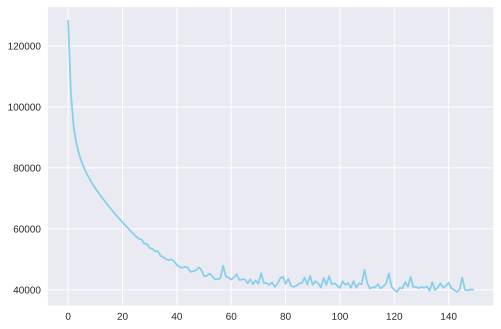

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

model = init_network(len(word_to_id), 10)

n_iter = 150
learning_rate = 0.01

history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="skyblue")
plt.show()

In [120]:
len(history)

150

In [51]:
np.argsort(result)[::-1][0:5]

array([ 15, 456, 179,  66, 263])

In [52]:
for word in (id_to_word[id] for id in np.argsort(result)[::-1][0:10]):
    print(word)


عشقت
فسردست
جمره
کنون
بگدازد
گرم
جانان
قد
بس
بنگرید


In [53]:
def get_word_similarities(word, model, n_similars=10):
    try:
        learning = one_hot_encode(word_to_id[word], len(word_to_id))
    except KeyError:
        print(f"Word = {word} is not in corpus")
        exit()
    result = forward(model, [learning], return_cache=False)[0]
    for word in (id_to_word[id] for id in np.argsort(result)[::-1][0:n_similars]):
        print(word)

    

In [159]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    return forward(model, one_hot)["a1"]

In [160]:
get_embedding(model, "machine")


array([ 0.30857583, -0.26536961, -0.91359514, -0.00943186, -1.03899812,
       -0.81462034, -0.56576872, -1.75023053,  0.16655075, -0.03339144])

In [121]:
word_to_id

{'میوه': 0,
 'بلبل': 1,
 'بلافد': 2,
 'نرهد': 3,
 'نحله': 4,
 'نصف': 5,
 'عیونی': 6,
 'شاد': 7,
 'ترید': 8,
 'قوموا': 9,
 'میر': 10,
 'جبریل': 11,
 'محبته': 12,
 'تهیجنی': 13,
 'اولهم': 14,
 'ولود': 15,
 'غرقه': 16,
 'سینه': 17,
 'بردمید': 18,
 'روح': 19,
 'آ': 20,
 'التناد': 21,
 'جهان': 22,
 'خوبی': 23,
 'صیاد': 24,
 'گرم': 25,
 'الفتور': 26,
 'رها': 27,
 'بیدی': 28,
 'رویش': 29,
 'تشنیع': 30,
 'شمر': 31,
 'للاجتهاد': 32,
 'انگور': 33,
 'درا': 34,
 'فدا': 35,
 'سر': 36,
 'حلو': 37,
 'ایدک': 38,
 'ساقی': 39,
 'گریبان': 40,
 'درآمد': 41,
 'عیون': 42,
 'ساکن': 43,
 'صبحدم': 44,
 'اندیشه': 45,
 'ودود': 46,
 'بشر': 47,
 'بالمنتصر': 48,
 'تن': 49,
 'خوبست': 50,
 'خاصا': 51,
 'شرم': 52,
 'مو': 53,
 'بقاست': 54,
 'یهولنکم': 55,
 'یار': 56,
 'مرتفع': 57,
 'برغم': 58,
 'عمان': 59,
 'فقیر': 60,
 'الموات': 61,
 'یعید': 62,
 'رسن': 63,
 'الکرام': 64,
 'قصر': 65,
 'مشت': 66,
 'جان': 67,
 'می\u200cدلگشا': 68,
 'نیم': 69,
 'کل': 70,
 'یهود': 71,
 'رخت': 72,
 'ویرانه': 73,
 'نشاید': 74,
 'مقیم': 75,


In [101]:
get_word_similarities('عیش', model, 10)

ایدک
خواجه
خامشان
سنایی
جدید
بمرد
دهل
عیش
الله
وگر


In [122]:
get_word_similarities('عیش', model, 10)

عیش
ایدک
ایا
جدید
دهل
سنایی
خام
تهیجنی
نضاره
وحوش


In [58]:
get_word_similarities('انگور', model, 20)

صافی
میخانه
فسرد
چونک
خوشه
انگور
خورشید
اجل
دوید
غرقه
ربود
کوی
دگران
بنگرید
پرتو
همگی
درد
اوفتاد
پر
صحرا


In [89]:
get_word_similarities('انگور', model, 20)

خورشید
اجل
فسرد
صافی
انگور
میخانه
خوشه
تن
چونک
طرب
نمود
رهید
پرتو
تافت
شکرش
خرف
نیست
فشرد
تبریز
او


In [123]:
get_word_similarities('انگور', model, 20)

تن
صاف
فسرد
اجل
میخانه
خوشه
انگور
چونک
خورشید
کشید#کش
فشرد
دست
همگی
پرتو
شنید#شنو
درد
زن
شبه
آفتاب
عاشق


In [62]:
get_word_similarities('بشر', model, 10)

قد
صدقه
محمود
باللقاء
بشر
دین
الکرام
نعم
حضرته
الکریم


In [88]:
get_word_similarities('بشر', model, 10)

صدقه
محمود
بذاک
حضرته
الکریم
باللقاء
یجعلنا
بشر
قد
مورود


In [124]:
get_word_similarities('بشر', model, 10)

محمود
حضرته
صدقه
بذاک
باللقاء
بشر
الکریم
یجعلنا
قد
حمدنا


In [99]:
get_word_similarities('ویرانه', model, 10)

باد
دید
وجود
عالم
جوید
جغدان
حلال
صد
ویرانه
باغ


In [125]:
get_word_similarities('ویرانه', model, 10)

دید
ویرانه
جهان
جست#جو
ماحضر
وجود
جغد
عالم
چشم
حلال
